<a href="https://colab.research.google.com/github/pravallikasri0229/pravallika-analyst-/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sn

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Medical Inventory Optimaization Dataset.csv")

In [ ]:
df.head(5)

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,6-1-2022,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,7/23/2022,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,6/23/2022,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,3/17/2022,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,12/21/2022,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM


In [ ]:
df.tail()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
14213,Sale,12018099994,Specialisation39,Department1,6/19/2022,3,0,61.436,145.200,0.0,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
14214,Sale,12018047025,Specialisation4,Department1,2/24/2022,2,0,64.448,119.692,0.0,Form1,PIPERACILLIN 1GM + TAZOBACTAM 125MG,INJECTIONS,ANTI-INFECTIVES
14215,Sale,12018017139,Specialisation1,Department1,6/27/2022,4,0,74.944,642.040,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
14216,Sale,12018044140,Specialisation20,Department1,7/30/2022,1,0,111.680,181.000,0.0,Form3,MEROPENEM 1GM INJ,INJECTIONS,ANTI-INFECTIVES
14217,Sale,12018116820,Specialisation26,Department1,10/24/2022,3,0,46.182,133.800,0.0,Form1,TRAMADOL,INJECTIONS,CENTRAL NERVOUS SYSTEM


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     14218 non-null  object 
 1   Patient_ID      14218 non-null  int64  
 2   Specialisation  14218 non-null  object 
 3   Dept            14218 non-null  object 
 4   Dateofbill      14218 non-null  object 
 5   Quantity        14218 non-null  int64  
 6   ReturnQuantity  14218 non-null  int64  
 7   Final_Cost      14218 non-null  float64
 8   Final_Sales     14218 non-null  float64
 9   RtnMRP          14218 non-null  float64
 10  Formulation     13565 non-null  object 
 11  DrugName        12550 non-null  object 
 12  SubCat          12550 non-null  object 
 13  SubCat1         12526 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.5+ MB


In [ ]:
df.isnull()


,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14213,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14214,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14215,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14216,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        653
DrugName          1668
SubCat            1668
SubCat1           1692
dtype: int64

In [ ]:
df['Formulation'] = df['Formulation'].fillna("unknown")

In [ ]:
df['DrugName'] = df['DrugName'].fillna("unknown")

In [ ]:
df['SubCat'] = df['SubCat'].fillna("unknown")

In [ ]:
df['SubCat1'] = df['SubCat1'].fillna("unknown")

In [ ]:
df.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

In [ ]:
feature_cols = ['Typeofsales',	'Patient_ID',	'Specialisation',	'Dept',	'Dateofbill' ,	'Quantity','ReturnQuantity',	'Final_Cost'	,'Final_Sales' ,	'RtnMRP','Formulation',	'DrugName',	'SubCat']
x = df[feature_cols]


In [ ]:
df.columns
x = df[['Typeofsales',	'Patient_ID',	'Specialisation',	'Dept',	'Dateofbill' ,	'Quantity','ReturnQuantity',	'Final_Cost'	,'Final_Sales' ,	'RtnMRP','Formulation',	'DrugName',	'SubCat']]
y = df['subcat1']

KeyError: ignored

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)
print(xtrain.shape,xtrain.ndim)
print(xtest.shape,xtest.ndim)
print(ytrain.shape,ytrain.ndim)
print(ytest.shape,ytest.ndim)

(11374, 4) 2
(2844, 4) 2
(11374,) 1
(2844,) 1


In [ ]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(xtrain,ytrain)
ytest_predicted = model.predict(xtest)

ValueError: ignored

In [ ]:
metrics.confusion_matrix(ytest,ytest_predicted)

<Axes: xlabel='Predicted', ylabel='Actual'>

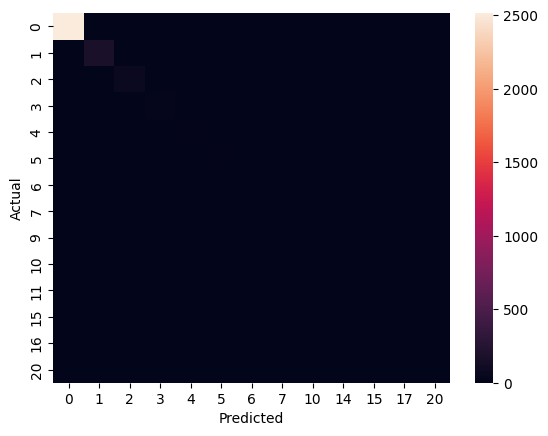

In [ ]:
conf_mat = pd.crosstab(ytest,ytest_predicted,rownames=["Actual"],colnames=["Predicted"])
sn.heatmap(conf_mat)

In [ ]:
label_encoder = LabelEncoder()
for column in [ 'Specialisation', 'Dept', 'Formulation', 'DrugName']:
    x[column] = label_encoder.fit_transform(x[column])

In [ ]:
label_encoder = LabelEncoder()
df['DrugName'] = label_encoder.fit_transform(df['DrugName'])

In [ ]:
scaler = StandardScaler()
df[['Final_Cost', 'Final_Sales']] = scaler.fit_transform(df[['Final_Cost', 'Final_Sales']])
print(scaler)

In [ ]:
X = df.drop('Final_Cost', axis=1)
y = df['Final_Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)